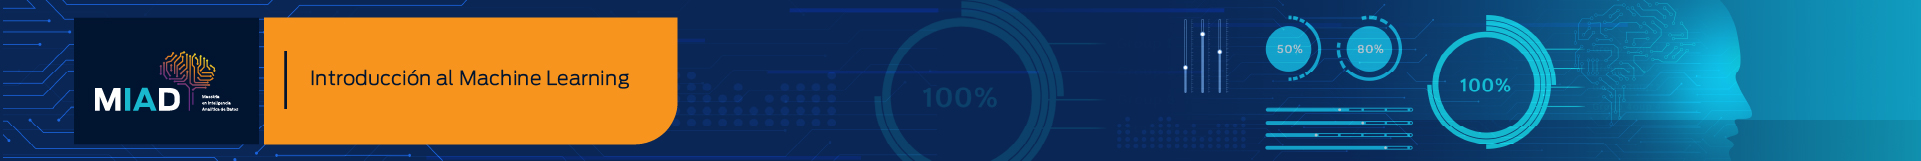

# Introducción al Machine Learning - Semana 5
## Caso: Aplicación de árboles de decisión y ensamblajes

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos basados en árboles y ensamblajes para seleccionar aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementar modelos de árboles sencillos, random forest y gradient boosting.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son: 

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación modelo de árbol de decisión: Se estima el modelo usando un árbol de decisión, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de bagging: Se estima el modelo usando bagging, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Estimación modelo de random forest: Se estima el modelo usando random forest, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de gradient boosting: Se estima el modelo usando gradient boosting, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos] 


### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Weekly", la cual contiene 8 variables predictivas sobre el índice bursátil S&P500 y 1089 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará la semana siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-weekly

###  Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [1]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####

#Importación de librerías
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [2]:
#Lectura de archivo fuente
df1 = pd.read_csv('./dataset-95529.csv')
df1['Direction'] = df1['Direction'].map({'Up': 1, 'Down': 0}).astype(int)
df1.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [3]:
#Dimensiones originales de dataset
df1.shape

(1089, 9)

In [4]:
#Variables de dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   int32  
dtypes: float64(7), int32(1), int64(1)
memory usage: 72.4 KB


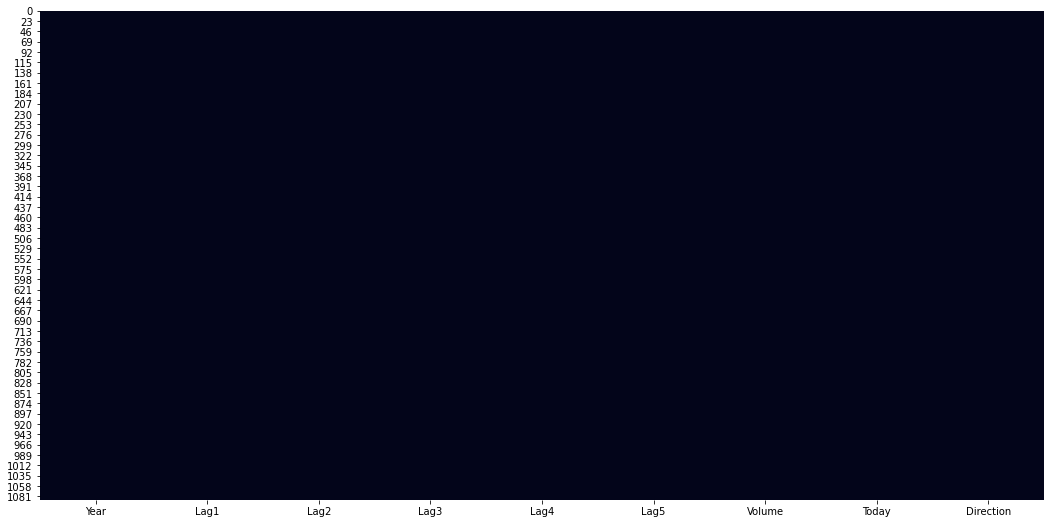

In [5]:
#Vistazo general de datos faltantes
plt.figure(figsize=(18, 9))
sns.heatmap(df1.isnull(), cbar=False)
plt.show()

In [6]:
#Estadísticas descriptivas
for i, col in enumerate(df1.columns):
    print(df1[col].describe(), '\n')

count    1089.000000
mean     2000.048669
std         6.033182
min      1990.000000
25%      1995.000000
50%      2000.000000
75%      2005.000000
max      2010.000000
Name: Year, dtype: float64 

count    1089.000000
mean        0.150585
std         2.357013
min       -18.195000
25%        -1.154000
50%         0.241000
75%         1.405000
max        12.026000
Name: Lag1, dtype: float64 

count    1089.000000
mean        0.151079
std         2.357254
min       -18.195000
25%        -1.154000
50%         0.241000
75%         1.409000
max        12.026000
Name: Lag2, dtype: float64 

count    1089.000000
mean        0.147205
std         2.360502
min       -18.195000
25%        -1.158000
50%         0.241000
75%         1.409000
max        12.026000
Name: Lag3, dtype: float64 

count    1089.000000
mean        0.145818
std         2.360279
min       -18.195000
25%        -1.158000
50%         0.238000
75%         1.409000
max        12.026000
Name: Lag4, dtype: float64 

count    1089.0

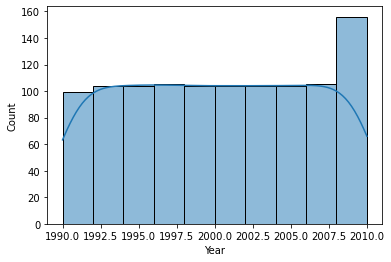

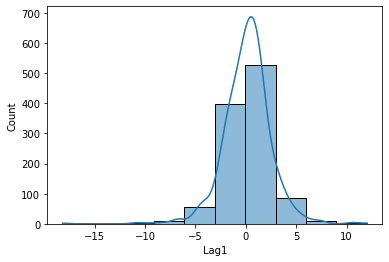

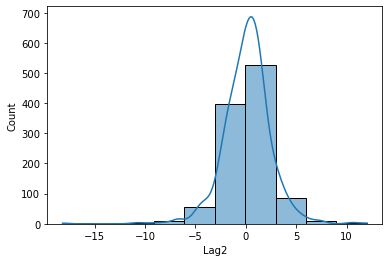

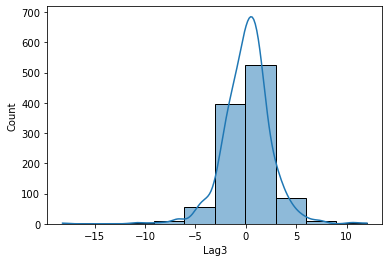

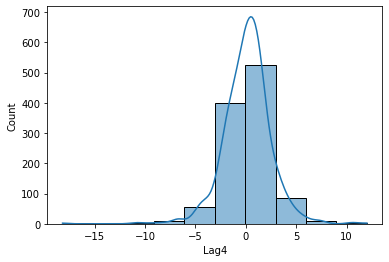

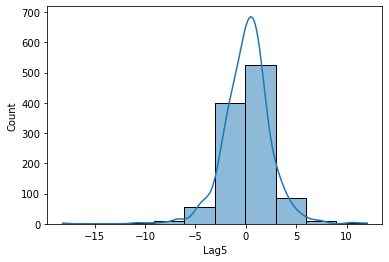

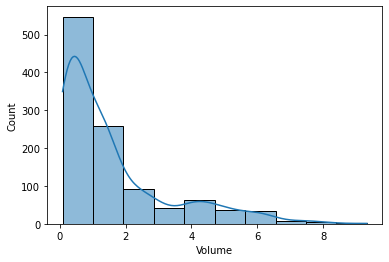

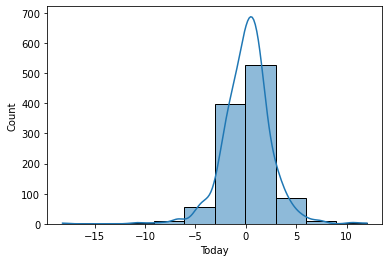

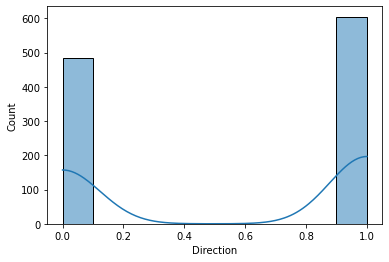

In [7]:
#Histogramas
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.histplot(df1[col], bins=10, kde=True)

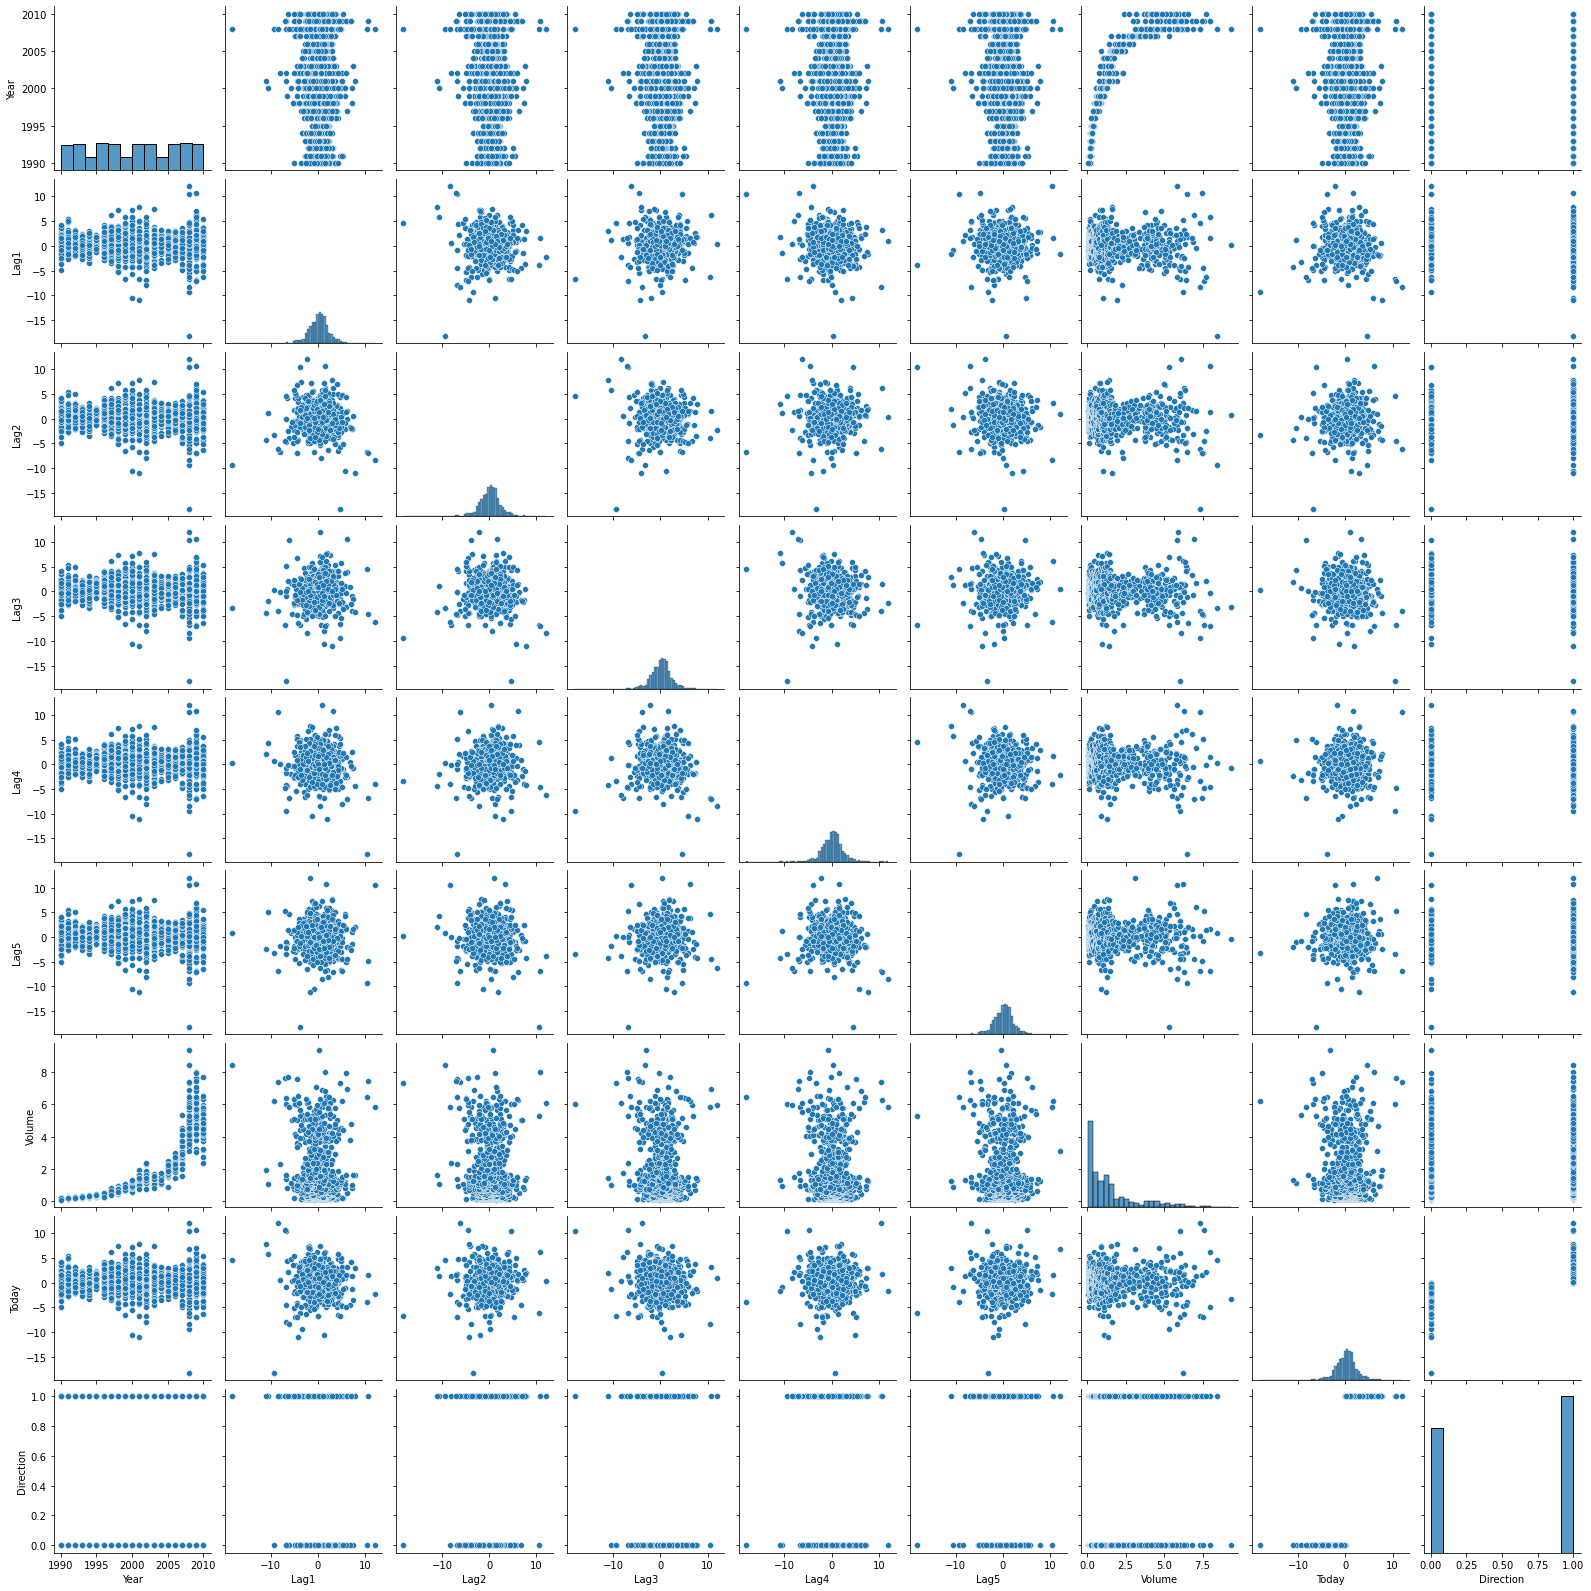

In [8]:
#Correlograma
sns.pairplot(df1, kind='scatter')
plt.show()

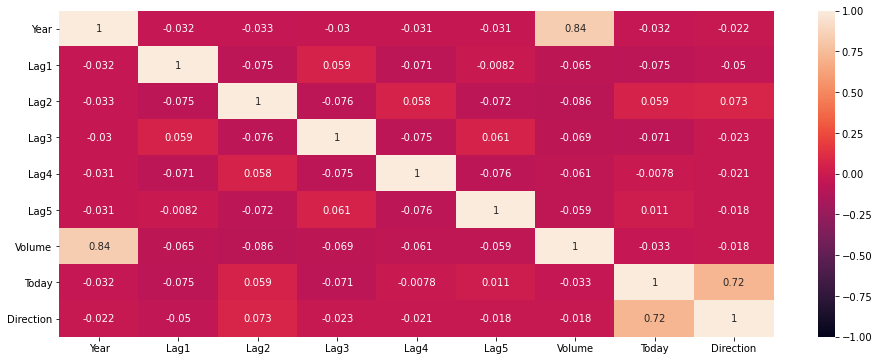

In [9]:
#Mapa de calor
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)

### Conclusiones punto 1

La base de datos proporcionada para el ejercicio posee 7 variables predictoras y una de respuesta (Direction), contiene 1089 observaciones y no hay datos faltantes. Se excluye la variable Today ya que contiene la información suficiente para indicar el sentido de la variable que se quiere predecir, y por lo tanto afecta el rendimiento del modelo.

Los histogramas y estadísticas nos muestran que para la mayoría de las variables la data se concentra en la mitad, es decir, tienen una distribución normal. Las excepciones son la variable Year que nos muestra que los datos están distribuidos de manera uniforme a través de los años, y la variable Volume que tiene un leve sesgo hacia la izquierda.

El correlograma nos enseña que para todos los pares de variables la gráfica resultante son puntos dispersos, lo que nos permite concluir que la correlación entre par de variables es muy débil (prácticamente nula). El par Year vs Volume muestra una correlación media.

Finalmente, se agrega un mapa de calor para mostrar la correlación numérica entre cada par de variables, donde se confirma lo descrito anteriormente.

### 2. Estimación modelo de árbol de decisión (20 puntos)
Estimen un árbol de decisión con la muestra de entrenamiento y calculen su poder predictivo evaluándolo en la muestra de test.

In [10]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

#Carga de datos
XTotal = df1.drop(['Today', 'Direction'], axis=1).to_numpy()
yTotal = df1['Direction'].to_numpy()

#Partición de datos
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.2, random_state=0)

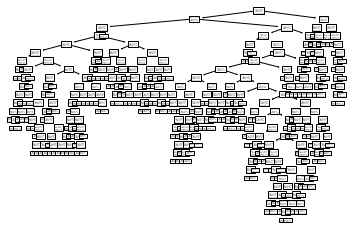

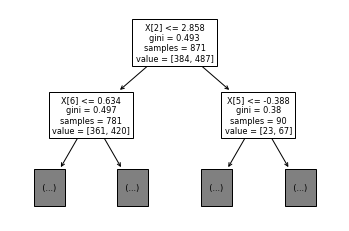

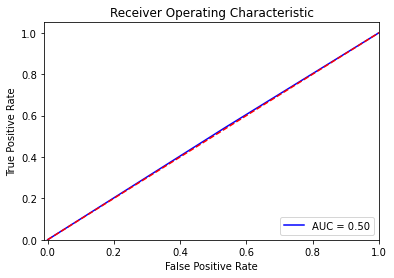

In [11]:
#Estimación del modelo usando Decision Tree
clfTree = DecisionTreeClassifier()
clfTree.fit(XTrain, yTrain)

plot_tree(clfTree)
plt.show()

plot_tree(clfTree,max_depth=1)
plt.show()

prediccionTree=clfTree.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionTree, pos_label=0)
AUCTree=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCTree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusiones punto 2

Como sabemos desde la teoría, los arboles de decisión pierden poder de predicción cuando se tienen variables continuas, lo cual es justo nuestro caso con la muestra de entrenamiento. Finalmente obtuvimos un AUC de 0.50.

En el primer nivel de árbol vemos que la variable que más explica el modelo es x[2], que en este caso es lag2, la cual tiene un Gini index de 0.493, indicándonos que la data es heterogenea, lo esperado para el primer nodo. 

El primer AUC que obtuvimos fue de 0.47. Para mejorarlo un poco cambiamos el tamaño de la muestra train de 67% a 80%. En ambos casos el resultado sigue siendo muy pobre.

### 3. Estimación modelo de bagging (20 puntos)
Estimen un modelo de bagging para árboles de decisión y calculen su poder predictivo evaluándolo en la muestra de test.

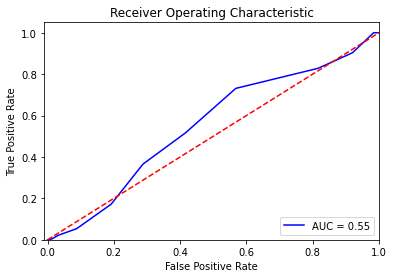

In [12]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

#Partición de datos
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.2, random_state=1)

#Estimación del modelo usando Bagging
clfBag = BaggingClassifier(n_estimators=10, random_state=0)
clfBag.fit(XTrain, yTrain)

prediccionBag=clfBag.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionBag, pos_label=0)
AUCBag=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCBag)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusiones punto 3

Al utilizar Bagging (muestreo con reemplazo) obtuvimos un AUC de 0.55, lo que indica que la tasa de verdaderos positivos en las predicciones del modelo es muy parecida a la de falsos positivos, es decir, es un resultado pobre similar al modelo de árboles de decisión.

Al igual que en el punto anterior, al principio obtuvimos un AUC inferior a 0.55. Para mejorarlo un poco cambiamos el tamaño de la muestra train de 67% a 80% y una semilla aleatoria de 1.

### 4. Estimación modelo de random forest (20 puntos)
Estimen un modelo de Random Forest y evalúen su poder predictivo en la muestra de test.

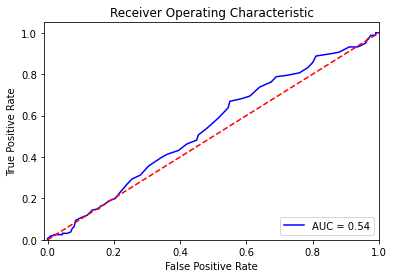

In [13]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####

#Partición de datos
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=5)

#Estimación del modelo usando Random Forest
clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(XTrain, yTrain)

prediccionRF=clfRF.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionRF, pos_label=0)
AUCRF=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusiones punto 4

Usando random forest obtuvimos un resultado un poco mejor que usando árboles de decisión, debido a la aletoriedad en el uso de las variables predictoras para calibrar el modelo en las distintas iteracioes. A pesar de esto, un AUC de 0.54 no es lo suficientemente bueno para poder considerar útil al modelo.

Al igual que en los modelos anteriores, para mejorar un poco el AUC se cambió la semilla aleatoria a 5 al realizar el particionamiento de los datos, ya que con el valor por defecto obtuvimos un AUC un poco más bajo.

### 5. Estimación modelo de gradient boosting (20 puntos)
Estimen un modelo de Gradient Boosting y evalúen su poder predictivo en la muestra de test.

Learning rate:  0.05
Accuracy score (training): 0.846
Accuracy score (validation): 0.497

Learning rate:  0.075
Accuracy score (training): 0.889
Accuracy score (validation): 0.511

Learning rate:  0.1
Accuracy score (training): 0.918
Accuracy score (validation): 0.514

Learning rate:  0.25
Accuracy score (training): 0.997
Accuracy score (validation): 0.533

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.514

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.575

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.569



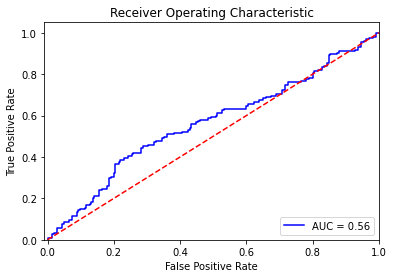

In [14]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=1)

#Estimación del modelo usando Gradient Boosting
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(XTrain, yTrain)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(XTrain, yTrain)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(XTest, yTest)))
    print()

prediccionGB=gb_clf.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionGB, pos_label=0)
AUCGB=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCGB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusiones punto 5

El poder del modelo usando Gradient Boosting no es bueno. En principio usamos los parámetros por defecto de la clase GradientBoostingClassifier obteniendo un AUC de 0.49.

Al probar con diferentes tasas de aprendizaje para mantener el sesgo en cada iteración (learning_rate) y un número de árboles alto (n_estimators), el máximo AUC que obtuvimos fue de 0.56.

Creemos que el resultado está relacionado directamente a la muestra de datos usada tanto para entrenar como para evaluar al modelo.

### 6. Selección del mejor modelo (10 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

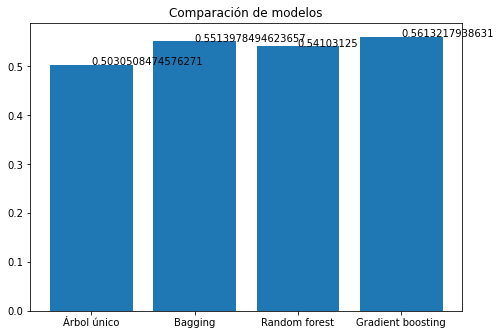

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['Árbol único','Bagging' ,'Random forest','Gradient boosting']
ejeY = [AUCTree,AUCBag,AUCRF,AUCGB]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Conclusiones punto 6

Generamos una gráfica comparativa entre los cuatro modelos para el AUC. El modelo Gradient Boosting es el que obtuvo el mejor desempeño por muy poco sobre el resto.

Una razón por la que este modelo obtuvo un mejor resultado es que permite jugar con la cantidad de árboles y el lambda que queremos aplicar al sesgo, para que el algoritmo explore zonas de X que se hubieran podido ignorar con un modelo que estima la función de una sola vez.

En general, el bajo rendimiento de los modelos se debe a que las dimensiones de la muestra global son pequeñas (1089 observaciones y 7 variables predictoras), es decir, de contar con un número de observaciones y variables mayor, el desempeño debería mejorar.